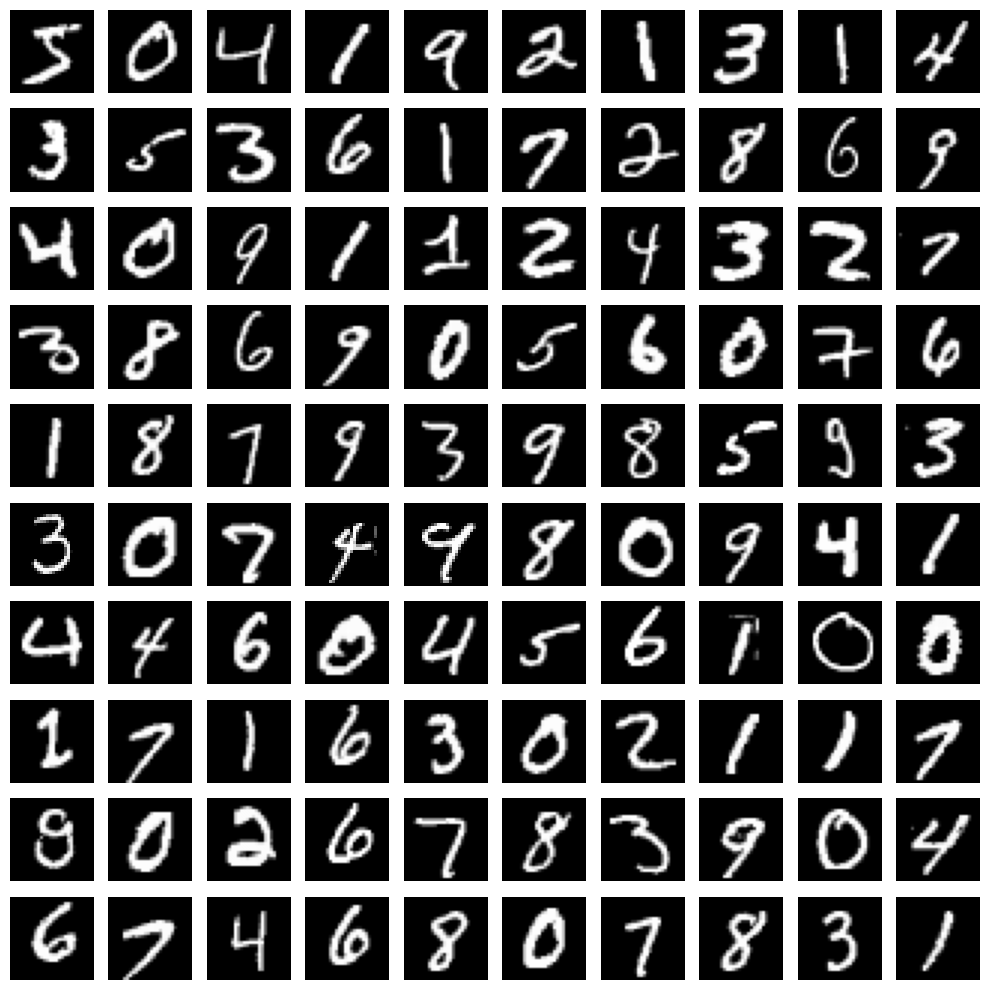

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (_, _) = mnist.load_data()

# Normalize the images
x_train = x_train / 255.0

# Plot 100 digits
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k], cmap='gray')
        ax[i][j].axis('off')
        k += 1

plt.tight_layout()
plt.show()


In [9]:
print("Shape of feature matrix:", x_train.shape)


Shape of feature matrix: (60000, 28, 28)


In [10]:
print("Shape of feature matrix:", y_train.shape)

Shape of feature matrix: (60000,)


In [11]:
print("First 10 labels in training data:", y_train[:10])

First 10 labels in training data: [5 0 4 1 9 2 1 3 1 4]


In [18]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the training labels
y_train_encoded = to_categorical(y_train)

# Print the one-hot encoding for the 1st observation
print("One-hot encoding for 1st observation:\n", y_train_encoded[0])


One-hot encoding for 1st observation:
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


W = tf.Variable(tf.zeros([784, 10]), name="weights")     # Weight matrix (input_size x output_classes)

In [25]:

# You can manually do predictions like:
logits = tf.matmul(x_train, W)

# Or better, define a model:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7091 - loss: 1.1456
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8723 - loss: 0.4852
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8892 - loss: 0.4115
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8940 - loss: 0.3829
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9007 - loss: 0.3593
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9017 - loss: 0.3514
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9078 - loss: 0.3351
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9083 - loss: 0.3291
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9120 - loss: 0.3187
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9102 - loss: 0.3242


In [28]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 784).astype(np.float32) / 255.0
y_train = to_categorical(y_train, 10).astype(np.float32)
y_test = to_categorical(y_test, 10).astype(np.float32)

# Model variables
W = tf.Variable(tf.zeros([784, 10]), name="weights")
b = tf.Variable(tf.zeros([10]), name="biases")

# Model function
def model(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Loss function
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred + 1e-10), axis=1))

# Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Training step
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = loss_fn(y, y_pred)
    grads = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(grads, [W, b]))
    return loss

# Training loop
for i in range(1000):
    idx = np.random.choice(x_train.shape[0], 100)
    batch_x = x_train[idx]
    batch_y = y_train[idx]
    loss = train_step(batch_x, batch_y)

# Accuracy check
def compute_accuracy(x, y):
    y_pred = model(x)
    correct = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
    return tf.reduce_mean(tf.cast(correct, tf.float32))

accuracy = compute_accuracy(x_test, y_test)
print("Test Accuracy:", accuracy.numpy())

Test Accuracy: 0.8712
